# Logistic Regression on UCLA's Admission Data 


<img src = "UCLA_image.png" alt = "UCLA Logo" length = 250 width = 250 />
 


We will use the logistic regression algorithm to develop a basic Neural Network that accurately determines if a student is accepted to UCLA or not. The features being used will be the GRE scores of the students, the GPA of the students, and the student rank (i.e. Explanation of Rank). 

At first, we will see logistic regression applied using only 1 feature: the gpa. After we complete this algorthm, and we make sure with visualizations that the algorithm is working correctly, we will use all three features and implement a multifeature logistic regression. We will always mean normalization for feature scaling and regularization to avoid overfitting. 

Since the data has 400 values we as usual will use 80% percent of the data(i.e. 400(.8) = 320 rows) for trainning and the other 20%(i.e.80 rows).

Let us start by importing the most important libraries, definning the sigmoid function and converting the data to the ideal format.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#defining the sigmoid function for logistic regression as sig
sig = lambda X: 1/(1+np.exp(-X))

UCLA_data = pd.read_csv('/users/luise/desktop/Jupyter_Notebooks/UCLA_Admissions_Data.csv')


print(UCLA_data.info())
print(UCLA_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None
Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')


In [2]:
UCLA_data.head() #print jupyter

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
UCLA_trainning_data = UCLA_data.loc[np.arange(320)] #choosing the first 320 as trainning data set
#UCLA_test_data = UCLA_data.loc[np.arange(320,400)]

UCLA_trainning_data #print jupyter

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
315,1,300,2.84,2
316,1,340,3.00,2
317,1,780,3.63,4
318,1,480,3.71,4


## We will now normalize the data using mean normalization

In [4]:
#we'll redefine/reassign to X to use as matrix of multiple features
X = np.hstack((np.ones((320,1)), UCLA_trainning_data[['gre','gpa','rank']].values.reshape(320,3)))



x_max = np.array([np.max(X[:,i+1]) for i in range(3)])  #contains values for feature scaling; plus 1 to avoid lookup in column of ones 
x_min = np.array([np.min(X[:,i+1]) for i in range(3)])  #contains values for feature scaling; plus 1 to avoid lookup in column of ones
x_mean = np.array([np.mean(X[:,i+1]) for i in range(3)])#contains means for feature scaling; plus 1 to avoid average column of ones

# implementing mean normalization
normalized_trainning_data = X #initializing new variable

normalized_trainning_data[:,1] = (X[:,1] - x_mean[0])/(x_max[0]-x_min[0])
normalized_trainning_data[:,2] = (X[:,2] - x_mean[1])/(x_max[1]-x_min[1])
normalized_trainning_data[:,3] = (X[:,3] - x_mean[2])/(x_max[2]-x_min[2])

normalized_trainning_data #print jupyter # in an np array

array([[ 1.        , -0.35732759,  0.12789152,  0.15416667],
       [ 1.        ,  0.12543103,  0.16237428,  0.15416667],
       [ 1.        ,  0.36681034,  0.35202945, -0.5125    ],
       ...,
       [ 1.        ,  0.33232759,  0.13938578,  0.4875    ],
       [ 1.        , -0.18491379,  0.18536279,  0.4875    ],
       [ 1.        , -0.08146552, -0.06176365, -0.5125    ]])

For more information on the different types of feature scaling tecchniques we recomend the following site: [Feature Scaling for Machine Learning](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/).

In [5]:
theta = np.random.rand(4,1)  #setting random theta values
y = UCLA_trainning_data['admit'].values.reshape(320,1)  # output variable 

num_training_eg = len(y) #number of training example
logistic_error_vector = np.array([])    #declaring nullarray of Mean Square Errors for future visualizations

learning_rate = 0.001      #for gradient descent


for iteration in range(1000):
    
    y_hat = np.matmul(normalized_trainning_data,theta)
    
    cost_vector = y*np.log(sig(y_hat)) + (1-y)*np.log(sig(1 - y_hat))

    #logistic error(i.e. error of every trainnin example gives particular weigths) 
    logistic_error = -1*(1/num_training_eg)*np.sum(cost_vector)
    logistic_error_vector = np.append(logistic_error_vector,logistic_error) #for future vizualization
    
    for index in range(len(cost_vector)):    
        theta[0,0] -= learning_rate*(y_hat[index]-y[index]) #updating the bias unit 
        theta[1,0] -= learning_rate*(y_hat[index]-y[index])*normalized_trainning_data[index,1]
        theta[2,0] -= learning_rate*(y_hat[index]-y[index])*normalized_trainning_data[index,2]
        theta[3,0] -= learning_rate*(y_hat[index]-y[index])*normalized_trainning_data[index,3]
        
print(theta)
logistic_error_vector

[[ 0.315625  ]
 [ 0.2486074 ]
 [ 0.28843583]
 [-0.34029349]]


array([0.44158907, 0.44270264, 0.44338698, 0.44376325, 0.44392505,
       0.4439411 , 0.44386038, 0.44371711, 0.44353489, 0.44332983,
       0.4431128 , 0.44289107, 0.44266945, 0.44245107, 0.44223791,
       0.44203117, 0.44183156, 0.4416394 , 0.44145482, 0.44127777,
       0.44110813, 0.4409457 , 0.44079024, 0.44064151, 0.44049925,
       0.4403632 , 0.44023309, 0.44010868, 0.43998973, 0.43987599,
       0.43976724, 0.43966326, 0.43956384, 0.43946879, 0.43937791,
       0.43929103, 0.43920796, 0.43912855, 0.43905263, 0.43898006,
       0.43891069, 0.43884438, 0.438781  , 0.43872042, 0.43866254,
       0.43860722, 0.43855436, 0.43850387, 0.43845563, 0.43840955,
       0.43836554, 0.43832351, 0.43828338, 0.43824508, 0.43820851,
       0.43817361, 0.43814031, 0.43810855, 0.43807825, 0.43804935,
       0.43802181, 0.43799555, 0.43797053, 0.43794669, 0.43792399,
       0.43790238, 0.43788181, 0.43786223, 0.43784361, 0.43782591,
       0.43780908, 0.4377931 , 0.43777792, 0.43776351, 0.43774

In [6]:
np.min(logistic_error_vector)

0.43755688826033734

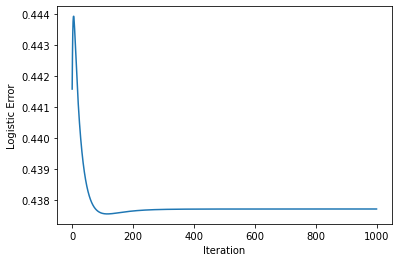

In [7]:
# plotting Logistic Error function 
plt.xlabel("Iteration")
plt.ylabel("Logistic Error")
#plt.tittle("Logistic Error per Iteration")
plt.plot(np.arange(len(logistic_error_vector)),logistic_error_vector)


In [8]:
print(theta.shape)
print("The hyperplane obtanied is given by the following formula: f(x1,x2,x3) = {} x3 + {} x2 + {} x1 + {}.".format(theta[3][0],theta[2][0],theta[1][0],theta[0][0]))


(4, 1)
The hyperplane obtanied is given by the following formula: f(x1,x2,x3) = -0.34029349445260665 x3 + 0.28843582601698 x2 + 0.24860739848854474 x1 + 0.31562499999999927.


In [9]:
def my_range(x):
    i = 0
    while i < x:
        yield i
        i += 1
my_range()

TypeError: my_range() missing 1 required positional argument: 'x'